In [1]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
import os
import random
import math
import pandas as pd
import scipy
import numpy.ma as ma
import itertools
import community
# from infomap import infomap
import os
import rpy2.robjects as robjects

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

In [3]:
dol_gml = nx.read_gml('dolphins.gml')
dol_txt = ldata ('dolphins.txt')
dol_gen = ldata ('dolphinsGender.txt')

In [4]:
for d in dol_gen:
    dol_gml.nodes[d[0]]["genero"]=d[1]

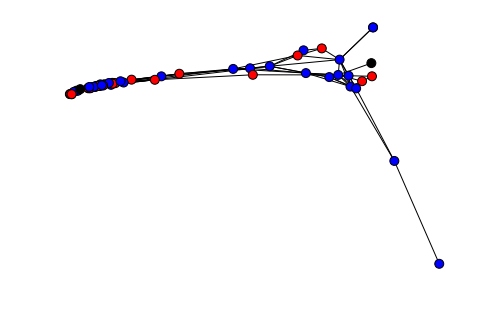

In [5]:
nx.draw_spectral(dol_gml, node_color=["blue" if genero=="m" else "red" if genero=="f" else "black" for genero in nx.get_node_attributes(dol_gml, "genero").values()], node_size = 80,with_labels=False, font_weight='bold')
plt.show ()

# EJERCICIO (1) A.

### Louvian

#### Lo que haremos con cada partición será generar diccionarios tales que la "key" sea el nombre del delfín y el "value" la comunidad a la cual pertenecen (asociada a un número)

In [6]:
louvian = community.best_partition(dol_gml)
print(louvian)
#la funcion best_partition(G) ya me devuelve un diccionario

{'Shmuddel': 0, 'Jonah': 1, 'Hook': 0, 'Quasi': 2, 'DN16': 2, 'DN21': 2, 'Double': 3, 'Stripes': 0, 'Whitetip': 0, 'Knit': 4, 'TR88': 0, 'Vau': 1, 'Patchback': 1, 'Ripplefluke': 2, 'Jet': 2, 'Thumper': 0, 'MN60': 1, 'MN105': 1, 'DN63': 4, 'PL': 4, 'CCL': 3, 'Mus': 2, 'Kringel': 0, 'Cross': 1, 'TR77': 4, 'SN63': 0, 'TR99': 0, 'TR120': 0, 'Zap': 3, 'Notch': 2, 'Grin': 0, 'Fish': 4, 'Beak': 4, 'Gallatin': 2, 'Bumper': 4, 'SN89': 3, 'Oscar': 3, 'Wave': 2, 'MN23': 2, 'Scabs': 0, 'SN100': 3, 'Topless': 1, 'Fork': 0, 'SN9': 0, 'TR82': 2, 'Beescratch': 2, 'SN96': 4, 'SN4': 0, 'Number1': 2, 'Web': 2, 'Feather': 2, 'Trigger': 1, 'TSN103': 0, 'Upbang': 2, 'Zig': 2, 'SMN5': 1, 'MN83': 1, 'SN90': 2, 'Zipfel': 0, 'TSN83': 0, 'Five': 1, 'Haecksel': 1}


In [7]:
fast_greedy = nx.algorithms.community.greedy_modularity_communities(dol_gml)
fast_greedy_dict = {}

for i in range(len(fast_greedy)):
    for node in fast_greedy[i]:
        fast_greedy_dict[node] = i

# print(fast_greedy)
print(fast_greedy_dict)

#La función reedy_modularity_communities(G) me devuelve una lista donde cada 
#elemento es un frozenset; y cada frozenset es una comunidad con sus respectivos delfines
#Para ello, nos generamos el diccionario apropiado

{'MN83': 2, 'Shmuddel': 0, 'Jonah': 2, 'Hook': 0, 'Quasi': 1, 'Kringel': 0, 'DN21': 1, 'TR77': 0, 'Stripes': 0, 'Vau': 2, 'Whitetip': 0, 'SN96': 0, 'DN16': 1, 'Patchback': 2, 'Zipfel': 0, 'Jet': 1, 'Thumper': 0, 'MN60': 2, 'MN105': 2, 'SN4': 0, 'TR82': 1, 'CCL': 2, 'Mus': 1, 'Cross': 2, 'Double': 2, 'Ripplefluke': 1, 'SN63': 0, 'SN89': 3, 'TR99': 0, 'TR120': 0, 'Zap': 2, 'Notch': 1, 'Grin': 0, 'Beak': 0, 'Bumper': 0, 'Gallatin': 1, 'TR88': 0, 'Fish': 0, 'Oscar': 1, 'Wave': 1, 'MN23': 1, 'Scabs': 0, 'SN100': 3, 'Topless': 2, 'Fork': 0, 'SN9': 0, 'Beescratch': 1, 'Knit': 1, 'DN63': 1, 'Number1': 1, 'Web': 1, 'Feather': 1, 'Trigger': 2, 'TSN103': 0, 'Upbang': 1, 'Zig': 1, 'SMN5': 2, 'PL': 1, 'SN90': 1, 'TSN83': 0, 'Five': 2, 'Haecksel': 2}


In [8]:
betweenness = nx.algorithms.community.centrality.girvan_newman(dol_gml)
a = [node for node in betweenness]
r=len(a) #r es el numero de diccionarios que tengo, por cada diccionario tengo x comunidades (mientras mas grande r, mas grande x)
diccionarios_bet=[]
for j in range(len(a)):
    betweenness_dict = {}
    for i in range(len(a[j])):
        for node in dol_gml.nodes:
            if node in a[j][i]:
                betweenness_dict[node] = i
    diccionarios_bet.append(betweenness_dict)
# print(r) 
# print(diccionarios_bet)

#La función beetweennes es un algoritmo que genera comunidades eliminando enlaces (de mayor a menor betweenness)
#Por lo tanto me devuelve un número r de diccionarios. Creamos entonces una lista que contenga a cada diccionario

In [9]:
def clusterize(nxG, algorithm, fig_name = "G"):
    """
    In:
        nxG: grafo de networkx.
        algorithm: string, entre las siguientes opciones: 
            fast_greedy
            edge_betweenness
            louvain
            infomap
        fig_name: nombre de la figura que se genera al clsuterizar. Le agrega automaticamente el nombre del algoritmo usado y el nombre del grafo si lo tuviere
    Out:
        labels: numpy array con la pertenencia de cada nodo al cluster.
    
    """
    gml_file_name = "G.gml"
    fig_name += "_"+nxG.name+"_"+algorithm+".svg"
    nx.write_gml(nxG, gml_file_name)
    
    igG = robjects.r('''
        f <- function(file, algorithm, fig_name, v_names){
            require("igraph")     
            
            G <- read.graph(file, "gml")
            V(G)$name <- as.character(unlist(v_names))
            #format = c("edgelist", "pajek", "ncol", "lgl", "graphml","dimacs", "graphdb", "gml", "dl"), ...)
            
            if(algorithm == "fast_greedy"){
                c <- fastgreedy.community(G)
                #c <- cluster_fast_greedy(G, merges = TRUE, modularity = TRUE, membership = TRUE)
            }
            
            if(algorithm == "edge_betweenness"){
                c <- edge.betweenness.community(G)
                #c <- cluster_edge_betweenness(G,directed = FALSE,edge.betweenness = TRUE)
            }
            
            if(algorithm == "louvain"){
                c <- multilevel.community(G)
                #c <- cluster_louvain(G)
            }
            
            if(algorithm == "infomap"){
                #c <- cluster_infomap(G)
                c <- infomap.community(G)
            }
            
            svg(fig_name)
            plot(c, G)
            dev.off()
            
            return(list(membership(c), as.character(V(G)$name)))
        }
    ''')
    
    labels = igG(gml_file_name, algorithm, fig_name, list(dict(nxG.nodes(data=True)).keys()))
    os.remove(gml_file_name)
    return {name: int(label) for name, label in zip(labels[1],labels[0])}


In [10]:
infomap = clusterize(dol_gml, 'infomap', fig_name = "G")

/home/facem/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: igraph

  warnings.warn(x, RRuntimeWarning)


In [11]:
#LOUVAIN
plt.figure(figsize=(10,10))
for name,label in diccionarios_bet[i].items():
    dol_gml.nodes()[name]["color"] = label
layouts=['spectral','random','spring','shell','circular']

plt.subplot(2,2,1)
pos = nx.spectral_layout(dol_gml)
nx.draw_networkx(dol_gml,pos, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)

plt.subplot(2,2,2)
pos = nx.random_layout(dol_gml)
nx.draw_networkx(dol_gml,pos, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)

plt.subplot(2,2,3)
pos = nx.spring_layout(dol_gml)
nx.draw_networkx(dol_gml,pos, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)

plt.subplot(2,2,4)
pos = nx.shell_layout(dol_gml)
nx.draw_networkx(dol_gml,pos, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)
plt.show()

IndexError: list index out of range

In [12]:
#FAST GREEDY
plt.figure(figsize=(15,15))

for name,label in diccionarios_bet[i].items():
    dol_gml.nodes()[name]["color"] = label

plt.subplot(2,2,1)
pos = nx.spectral_layout(dol_gml)
nx.draw_networkx(dol_gml,pos, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)

plt.subplot(2,2,2)
pos = nx.random_layout(dol_gml)
nx.draw_networkx(dol_gml,pos, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)

plt.subplot(2,2,3)
pos = nx.spring_layout(dol_gml)
nx.draw_networkx(dol_gml,pos, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)

plt.subplot(2,2,4)
pos = nx.shell_layout(dol_gml)
nx.draw_networkx(dol_gml,pos, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)
plt.show()

IndexError: list index out of range

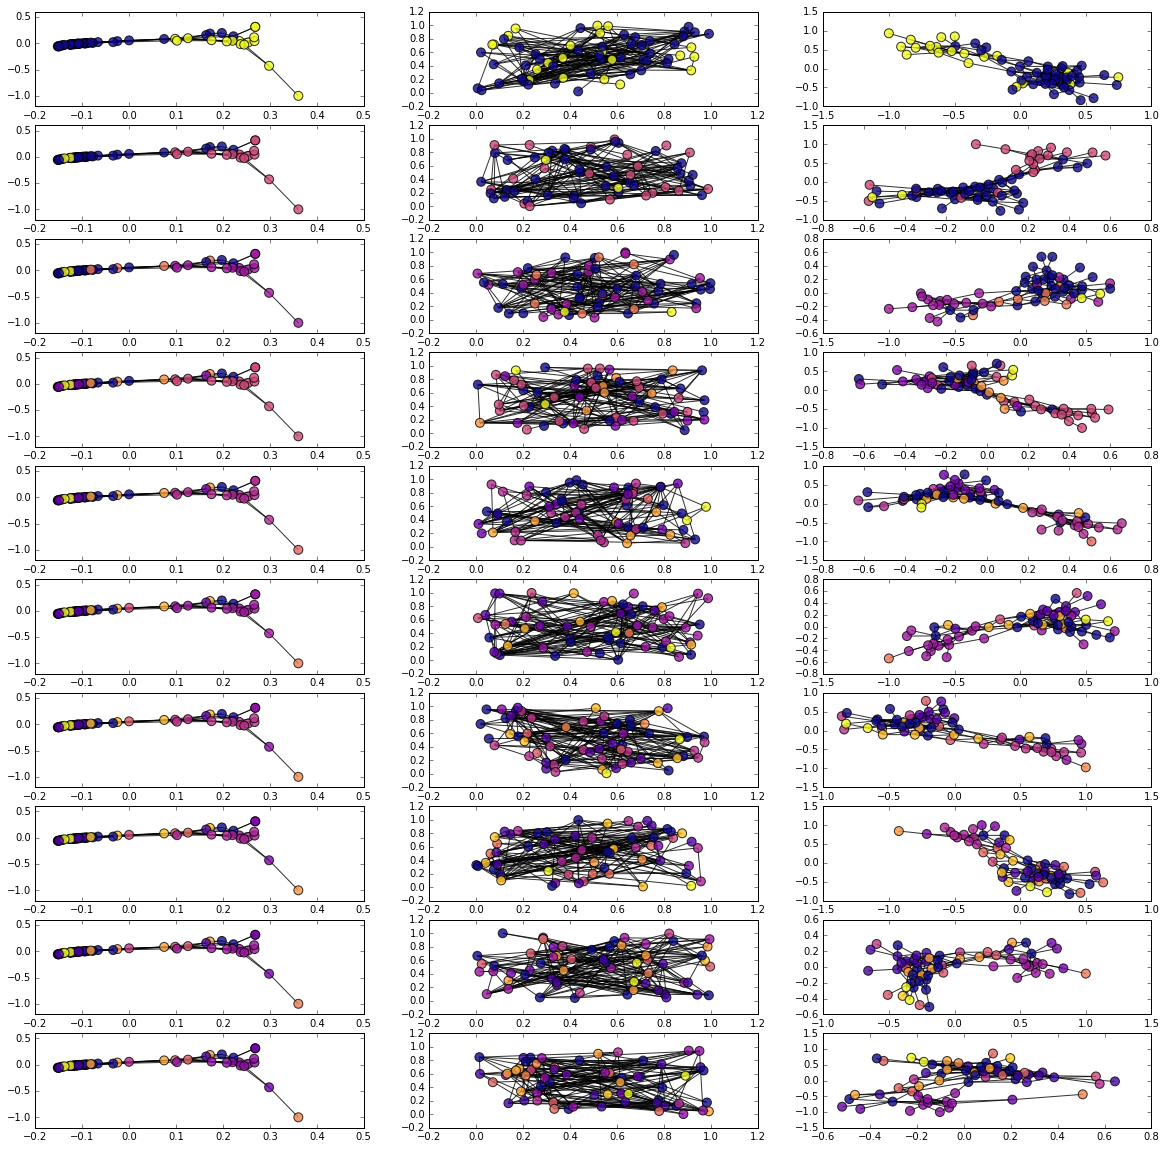

In [13]:
#BETWEENNESS
plt.figure(figsize=(20,20))

t=10 #parametro que me dice hasta cuantos diccionarios de betweenness usa
for i in range(t):
    for name,label in diccionarios_bet[i].items():
        dol_gml.nodes()[name]["color"] = label
        
    plt.subplot(t,3,3*i+1)
    pos = nx.spectral_layout(dol_gml)
    nx.draw_networkx(dol_gml,pos, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)

    plt.subplot(t,3,3*i+2)
    pos = nx.random_layout(dol_gml)
    nx.draw_networkx(dol_gml,pos, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)

    plt.subplot(t,3,3*i+3)
    pos = nx.spring_layout(dol_gml)
    nx.draw_networkx(dol_gml,pos, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)


plt.show()

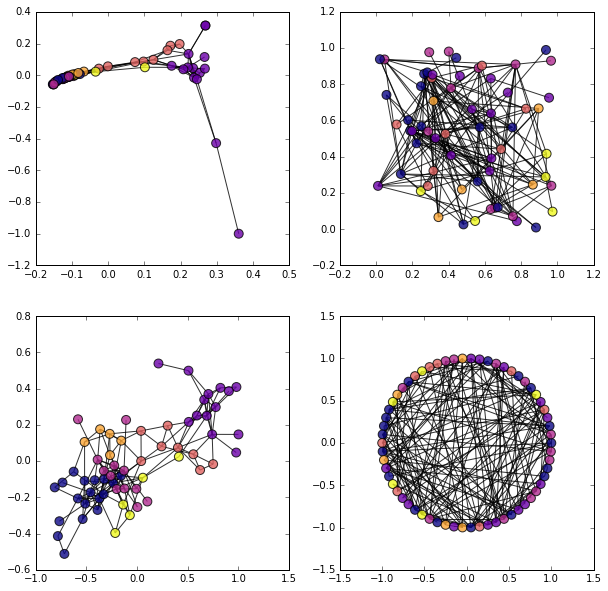

In [14]:
#INFOMAP
plt.figure(figsize=(10,10))
for name,label in infomap.items():
    dol_gml.nodes()[name]["color"] = label

layouts=['spectral','random','spring','shell','circular']

plt.subplot(2,2,1)
pos = nx.spectral_layout(dol_gml)
nx.draw_networkx(dol_gml,pos, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)

plt.subplot(2,2,2)
pos = nx.random_layout(dol_gml)
nx.draw_networkx(dol_gml,pos, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)

plt.subplot(2,2,3)
pos = nx.spring_layout(dol_gml)
nx.draw_networkx(dol_gml,pos, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)

plt.subplot(2,2,4)
pos = nx.shell_layout(dol_gml)
nx.draw_networkx(dol_gml,pos, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)
plt.show()

# EJERCICIO (1) B.

# Modularidad y silhouette

In [343]:
#S = (b-a)/max(b,a)
#a = mean distance between elements of the same cluster and a sample
#b = mean distance between elements of the nearest cluster and the sample


def silhouette(g,dic):
    a = []
    b = []
    S = []

    for node in g.nodes:
        dist_a = []
        dist_b = []
        for vecino in g.nodes:
            if dic[vecino] == dic[node] and node != vecino:
                dist_a.append(nx.shortest_path_length(g, source=node, target=vecino, weight=None))
            elif node != vecino:
                dist_b.append([nx.shortest_path_length(g, source=node, target=vecino, weight=None),dic[vecino]])
        if len (dist_a) != 0:
            a.append(sum(dist_a)/len(dist_a))
        else:
            a.append(0)

        bcontrol = []
        for i in range(min(list(dic.values())),max(list(dic.values()))+1):
            if i != dic[node]:
                suma = 0
                r = 0
                for distancias in dist_b:
                    if distancias[1] == i:
                        r = r + 1
                        suma = suma + distancias[0]
                if r != 0:
                    bcontrol.append(suma/r)
                else:
                    bcontrol.append(0)

        b.append(min(bcontrol))
    
    sil = {}
    for j,node in zip(range(len(a)),g.nodes()):
        sil[node] = (b[j]-a[j])/max([b[j],a[j]])
        
    for i in range(len(a)):
        
        S.append((b[i]-a[i])/max([b[i],a[i]]))
    Sprom=sum(S)/len(S)
#     print(S)
#     print(b)
#     print(a)
#     print(type(sil))     
    return sil,Sprom

    # for i in range(max(list(dic.values()))):

In [346]:
sil,S = silhouette(dol_gml,louvian)
# print(type(sil))
print(S)

0.26319504718610015


In [347]:
#Grafico Silhouette
def grafico_sil(g,dic):
    
    sil,S = silhouette(g,dic)
#     print(type(sil))
    valores = []

    for i in range(max(list(dic.values()))+1):
        valores2=[]
        for node in g.nodes:
#             print(sil[node])
            if dic[node] == i:
                valores2.append([node,sil[node]])
        valores2.sort(key=lambda cluster: cluster[1], reverse=True)
        valores.append(valores2)
#     print(valores)
    
    datax=[]
    for i in range(len(valores)):
        for j in range(len(valores[i])):
            datax.append(valores[i][j][1])
            
    plt.bar(np.linspace(1,len(datax),len(datax)),datax, width=0.8, bottom=None)
    plt.show()
    
#     x=np.zeros(len(list(g.nodes())))
#     y=np.zeros(len(list(g.nodes())))
#     t=-1
#     for i in range(len(valores[0])):
#         x[i+1]=x[i]+1
#         y[i]=y[i]+valores[0][i][1]
    
#     for i in range(1,len(valores)):
#         for j in range(len(valores[i])):
#             x[(j)+len(valores[i-1])]=x[(j)+len(valores[i-1])-1]+1
#             y[(j)+len(valores[i-1])]=valores[i][j][1]
    
#     plt.plot(y,x,'o')
#     plt.show()

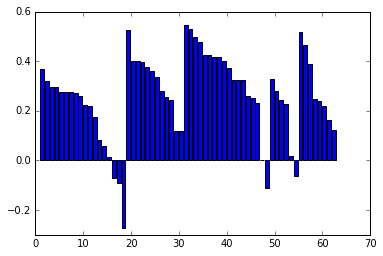

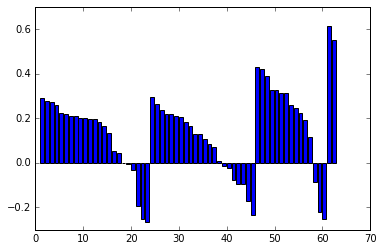

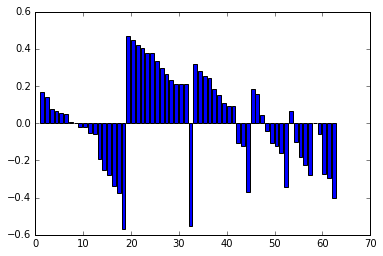

In [350]:
grafico_sil(dol_gml,louvian)

grafico_sil(dol_gml,fast_greedy_dict)

# for i in range(10):
#     grafico_sil(dol_gml,diccionarios_bet[i])
    
grafico_sil(dol_gml,infomap)

# PROBLEMA: VER QUE PORONGA PASA CON INFOMAP ACA ARRIBA EN EL ULTIMO GRAFICO

### Louvian

In [21]:
lou_mod = community.modularity(louvian,dol_gml)
d,lou_sil = silhouette(dol_gml,louvian)
print(lou_mod)
print(lou_sil)

0.5188283691309679
0.26319504718610015


### Fast Greedy

In [22]:
fast_greedy_mod = community.modularity(fast_greedy_dict,dol_gml)
d,fast_greedy_sil = silhouette(dol_gml,fast_greedy_dict)
print(fast_greedy_mod)
print(fast_greedy_sil)

0.4954906847039278
0.1379546327967555


### Betweenness

[0.3787033740753926, 0.38149202958743716, 0.45807127882599574, 0.5193821446936434, 0.5139234998615562, 0.517562596416281, 0.49072425932518493, 0.49380958031723426, 0.48955737510383285, 0.4852853921917645]
[0.2876273324278876]


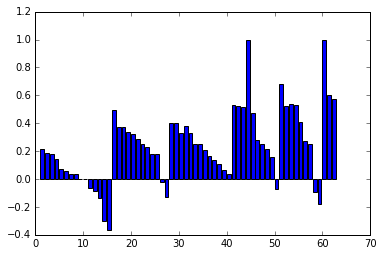

In [351]:
t=10 #numero de particiones que quiero analizar
bet_mod = [] #Creo una lista que contenga a la modularidad correspondiente a cada t
for i in range(t):
    mod = community.modularity(diccionarios_bet[i],dol_gml)
    bet_mod.append(mod)

ind = bet_mod.index(max(bet_mod))
# print(ind)
bet_max_mod = diccionarios_bet[ind]
print(bet_mod)

bet_sil = [] #Creo una lista que contenga a la silhouette correspondiente a cada t
d, s = silhouette(dol_gml,bet_max_mod)
bet_sil.append(s)
print(bet_sil)
grafico_sil(dol_gml,diccionarios_bet[i])
# print(bet_sil)

###  Infomap

In [352]:
infomap_mod = community.modularity(infomap,dol_gml)
d, infomap_sil = silhouette(dol_gml,infomap)
print(infomap_mod)
print(infomap_sil)

0.2787864404097939
0.017705526773799482


# Preguntas a Gonza 
### b) recablear las redes de forma aleatoria manteniendo la distribucion de grado y calcular para cada red recableada el fast greedy, louvian (se puede tambien infomap y betweenes pero puede llevar mucho tiempo, en el caso de beetweenness, lo que hay que hacer es calcular para cada particion que te devuelve, la modularidad y silouhette y aggarrar la particion de maxima modularidad, y esa usarla para promediar), promediarlos entre si y compararlos con los valores de las redes que ya tengo. Para eso, realizar un histograma de la distribucion y ver en que valor cae el de las redes reales; calular el p-value para ver que onda, si p-value es cercano a cero, entonces puedo decir que mi red es modular.

### Redes recableadas

In [25]:
#Quiero recablear mi grafo manteniendo la diostribucion de grado
#Defino la funcion que me redistribuya el los enlaces
def recableado(g,nro_de_veces):
    fg = []
    lou = []
    dist_grado = []
    for i in g.nodes():
        dist_grado.append(g.degree(i))
    
    for _ in range(nro_de_veces):

        r = nx.generators.degree_seq.configuration_model(dist_grado)
        louvian = community.best_partition(r)
        lou_mod = community.modularity(louvian,r)
        lou.append(lou_mod)
        fast_greedy = nx.algorithms.community.greedy_modularity_communities(r) 
        fast_greedy_dict = {}

        for i in range(len(fast_greedy)):
            for node in fast_greedy[i]:
                fast_greedy_dict[node] = i

        fast_greedy_mod = community.modularity(fast_greedy_dict,r)
        fg.append(fast_greedy_mod)
    
    lou_array = np.asarray(lou)
    fg_array = np.asarray(fg)
    
    plt.hist (lou_array)
    plt.xlabel("Modularidad")
    plt.ylabel ("Distribución")
    plt.title ("Louvian")
    
    plt.show ()
    
    plt.hist (fg_array)
    plt.xlabel("Modularidad")
    plt.ylabel ("Distribución")
    plt.title ("Fast Greedy")
    
    plt.show ()
    
    promedio_lou = sum(lou)/len(lou)
    promedio_fg = sum(fg)/len(fg)

    return [promedio_lou,promedio_fg]

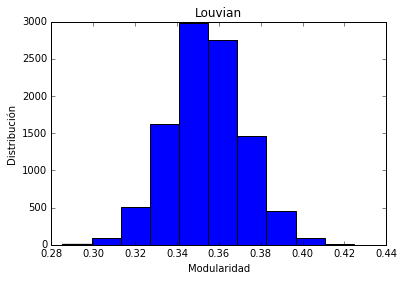

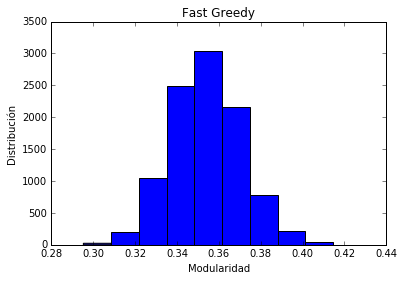

[0.35423124283058516, 0.3539121138404337]


In [353]:
resultado = recableado(dol_gml,10000)
print(resultado)
plt.show ()

## Ejercicio 1.C

In [27]:
def acuerdo_entre_particiones(g,diccionarios):
    acuerdo = []
    for k in range(len(diccionarios)-1):
        acuerdo2 = []
        for m in range(k+1,len(diccionarios)):

            recorridos = []

            N_juntos_ambas = 0 #Numero de pares de nodos que comparten comunidades en ambas particiones. (a)
            N_separados_ambas = 0 #Numero de pares de nodos que NO ESTAN en la misma comunidad en ambas particiones. (d)
            N_juntos_separados = 0 #Numero de pares de nodos que estan juntos en una particion y separados en otra. (c)
            N_separados_juntos = 0 #Numero de pares de nodos que estan separados en una particion y juntos en otra. (b)
           
            nodos = list (dol_gml.nodes())
            
            for node1 in dol_gml.nodes():
                for node2 in dol_gml.nodes():
                    if node1 != node2 and not node1 in recorridos:
                        if diccionarios[k][node1] == diccionarios[k][node2] and diccionarios[m][node1] == diccionarios[m][node2]:
                            N_juntos_ambas = N_juntos_ambas + 1
                        elif diccionarios[k][node1] != diccionarios[k][node2] and diccionarios[m][node1] != diccionarios[m][node2]:
                            N_separados_ambas = N_separados_ambas + 1
                        elif diccionarios[k][node1] == diccionarios[k][node2] and diccionarios[m][node1] != diccionarios[m][node2]:
                            N_juntos_separados = N_juntos_separados + 1
                        elif diccionarios[k][node1] != diccionarios[k][node2] and diccionarios[m][node1] == diccionarios[m][node2]:
                            N_separados_juntos = N_separados_juntos + 1
                recorridos.append (node1)
            precision = (float (N_juntos_ambas + N_separados_ambas) / (N_juntos_ambas + N_separados_ambas + N_juntos_separados + N_separados_juntos))
                
            acuerdo2.append(precision)
        
        acuerdo.append(acuerdo2)
        
    return acuerdo
    

In [28]:
diccionarios = [louvian, fast_greedy_dict, bet_max_mod, infomap]

In [29]:
print(acuerdo_entre_particiones(dol_gml,diccionarios))

[[0.8799576943416182, 0.9053410893707033, 0.8069804336329984], [0.8434690639873083, 0.7567424643046008], [0.7493389740877843]]


## Ejercicio 1.D

In [305]:
def pvalue(x,lista):
    pval=0
    m = np.asarray(lista).mean()
    l=len(lista)
    if x < m:
        for valor in lista:
            if valor <= x:
                pval = pval + 1
    else:
        for valor in lista:
            if valor >= x:
                pval = pval + 1
    
    return pval/l     

In [312]:
import matplotlib.patches as mpatches

In [340]:
def proporciones(g,diccionario):
    prop_dic = []
    
    generos = []
    delfines = []
    for d in dol_gen:
        generos.append(d[1])
        delfines.append(d[0])
    
#     for k in range(len(diccionario)):
    prop_com=[]

    machoscomunidad = []
    hembrascomunidad = []
    NAcomunidad = []
     
    for i in range(min(list(diccionario.values())),max(list(diccionario.values())) + 1):
        machoscomunidad.append([])
        hembrascomunidad.append([])
        NAcomunidad.append([])
        f = 0
        m = 0
        NA = 0

        for node in dol_gml.nodes():
            if diccionario[node] == i:
                if dol_gml.nodes[node]["genero"] == "f":
                    f = f + 1
                elif dol_gml.nodes[node]["genero"] == "m":
                    m = m + 1
                elif dol_gml.nodes[node]["genero"] == "NA":
                    NA = NA + 1
        n=NA+m+f
        machoscomunidad[i-min(list(diccionario.values()))].append(m/n)
        hembrascomunidad[i-min(list(diccionario.values()))].append(f/n)
        NAcomunidad[i-min(list(diccionario.values()))].append(NA/n)
    print(machoscomunidad)
  
 #quiero asignar los generos de manera aleatoria 1000 veces.

    r_machoscomunidad = []        
        
    for _ in range (10000): 
        random.shuffle (generos)
        for delf in delfines:
            g.nodes[delf]["genero"] = generos[delfines.index(delf)]

        for i in range (min(list(diccionario.values())),max(list(diccionario.values())) + 1):
            r_machoscomunidad.append([])
            r_f = 0
            r_m = 0
            r_NA = 0
            r_n = 0
            for node in dol_gml.nodes():
                if diccionario [node] == i:
                    if dol_gml.nodes[node]["genero"] == "f":
                        r_f = r_f + 1
                    elif dol_gml.nodes[node]["genero"] == "m":
                        r_m = r_m + 1
                    elif dol_gml.nodes[node]["genero"] == "NA":
                        r_NA = r_NA + 1

            r_n = r_f + r_m + r_NA

            r_machoscomunidad[i-min(list(diccionario.values()))].append(r_m/r_n)
    
#       Hago histograma        
    for i in range(len(machoscomunidad)):
#         plt.subplot(max(list(diccionario.values())),1,i+1)
        plt.hist (r_machoscomunidad[i],range=(0,1))
        plt.axvline(x=machoscomunidad[i],linewidth=3, color='r',label=str(machoscomunidad[i]))
        plt.axvline(np.asarray(r_machoscomunidad[i]).mean(), color='k', linestyle='dashed', linewidth=1,label=str(np.asarray(r_machoscomunidad[i]).mean()))
        plt.xlabel("Proporción de machos en la comunidad")
        
        pv = pvalue(machoscomunidad[i][0],r_machoscomunidad[i])
        black_patch = mpatches.Patch(color='black', label='P-valor = ' + str(pv))
        plt.legend(handles=[black_patch])
#         plt.legend()
        plt.title('Infomap')
    
#         plt.ylabel ("Cantidad de apariciones de dichos enlaces")
        plt.savefig ("generos_azar_histo_FASTGREEDY" + str(i) + ".png") 
        plt.show ()

    for d in dol_gen:
        dol_gml.nodes[d[0]]["genero"]=d[1]
            
        
#     return machoscomunidad, r_machoscomunidad[max(list(diccionario.values()))-min(list(diccionario.values()))]

[[0.15], [0.75], [0.7619047619047619], [0.7142857142857143], [0.5]]


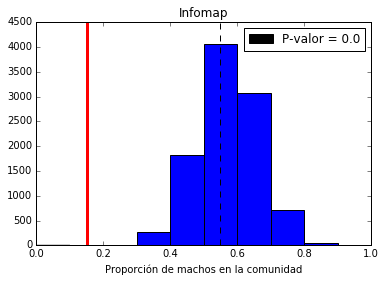

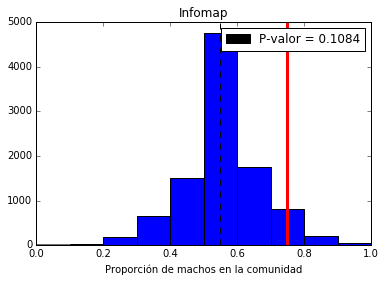

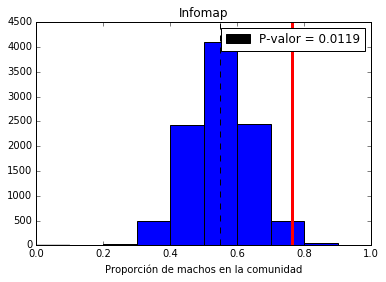

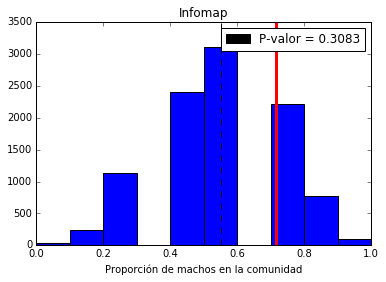

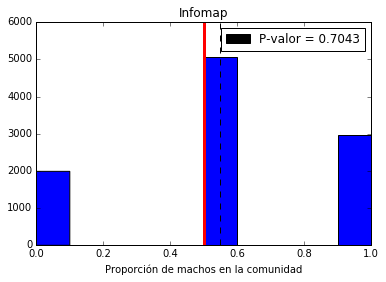

In [342]:
proporciones(dol_gml,diccionarios[2])


## Preguntillas
#### falta: 
* infomap
* 1.C comparar lovian con betweenes y fast greedy con betweenness // el diccionario de betweenness con maxima modularidad esta en la variable: ""bet_max_mod=diccionarios_bet[3]""
* 1.C Ver informacion mutua (para todos los pares de particiones)
* 1.C ver de realizar las comparaciones poara la red aleatoria (aleatorizar la red + realizar las tres particiones + realizar la comparacion de allas como esta en el codigo de 1.C)
* 1.D  ¿ Hay que calcular la probabilidad de tener una dada cantidad de machos, hembras y NA para cada cluster o con un genero por cluster alcanza?
